In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [34]:
recastData = pd.read_pickle('limits_cms_top_20_001.pcl')
#print(recastData['yDM (95% C.L.)'])

### Plot limit on yDM

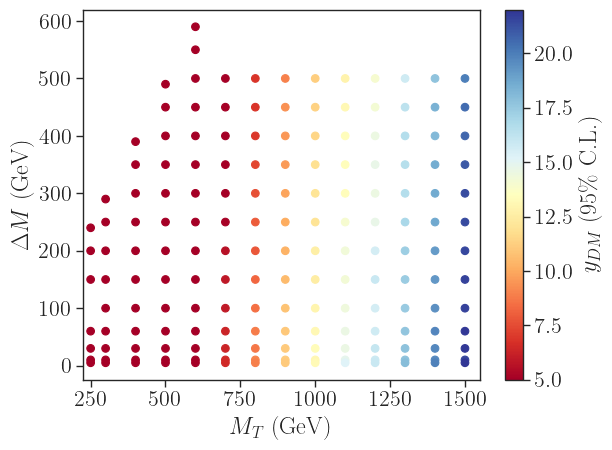

In [35]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}$ (95\% C.L.)')
plt.xlabel(r'$M_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(225.,1550.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [50]:
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([4*np.pi, 5.,10.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

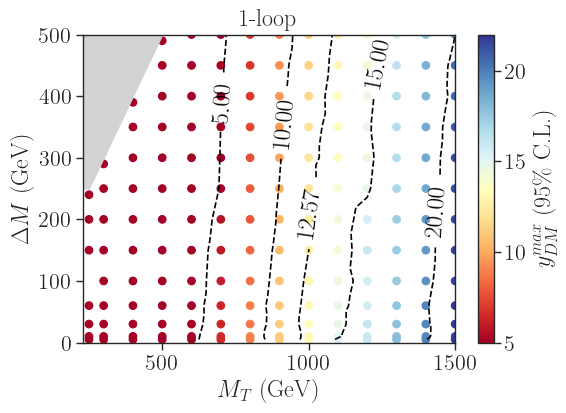

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('1-loop')
plt.xlim(230.,1500.)
plt.ylim(0.,500.)
plt.show()

In [52]:
recastData[recastData['mPsiT'] ==400.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
18,400.0,10.0,1.814690
19,400.0,50.0,1.528777
20,400.0,100.0,1.857914
21,400.0,150.0,2.050553
22,400.0,200.0,2.082872
23,400.0,250.0,2.029178
24,400.0,300.0,2.229611
25,400.0,340.0,2.557283
26,400.0,370.0,2.442315
27,400.0,390.0,2.555466


In [53]:
recastData[recastData['mPsiT'] ==500.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
29,500.0,10.0,1.876846
30,500.0,50.0,1.879103
31,500.0,100.0,1.886716
32,500.0,150.0,2.033165
33,500.0,200.0,2.154041
34,500.0,250.0,2.132557
35,500.0,300.0,2.419522
36,500.0,350.0,2.653955
37,500.0,400.0,2.573995
38,500.0,440.0,3.069635


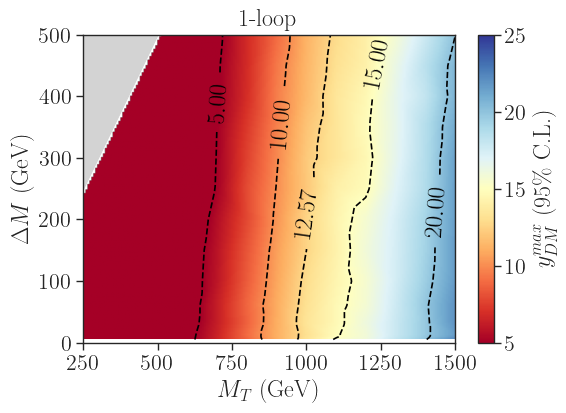

In [57]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_CMS_one_loop.png', bbox_inches='tight')
plt.show()

### Save contour curves to text files

In [41]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mPsiT_GeV,deltaM_GeV')


Contours saved to CMS_mtt_oneLoop_contours.csv
